In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [3]:
data=pd.read_csv("train_data.txt",sep=":::", names=["ID","TITLE","GENRE","DESCRIPTION"], engine="python")
data.dropna(subset=["DESCRIPTION", "GENRE"], inplace=True)
data

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...,...
54209,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54210,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54211,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54212,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


In [4]:
data["DESCRIPTION"] = data["DESCRIPTION"].str.lower()

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.preprocessing import LabelEncoder

In [6]:
nltk.download('stopwords')

stop_words = set(stopwords.words("english"))
stemmer = PorterStemmer()

def preprocess(text):
    text = re.sub(r"[^a-zA-Z]", " ", text)
    tokens = text.lower().split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

data["DESCRIPTION"] = data["DESCRIPTION"].apply(preprocess)
print("done")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shanm\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


done


In [7]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_features=5000,
    ngram_range=(1, 2)  # Include bigrams
)

X = vectorizer.fit_transform(data["DESCRIPTION"])

encoder = LabelEncoder()
y = encoder.fit_transform(data['GENRE']) 

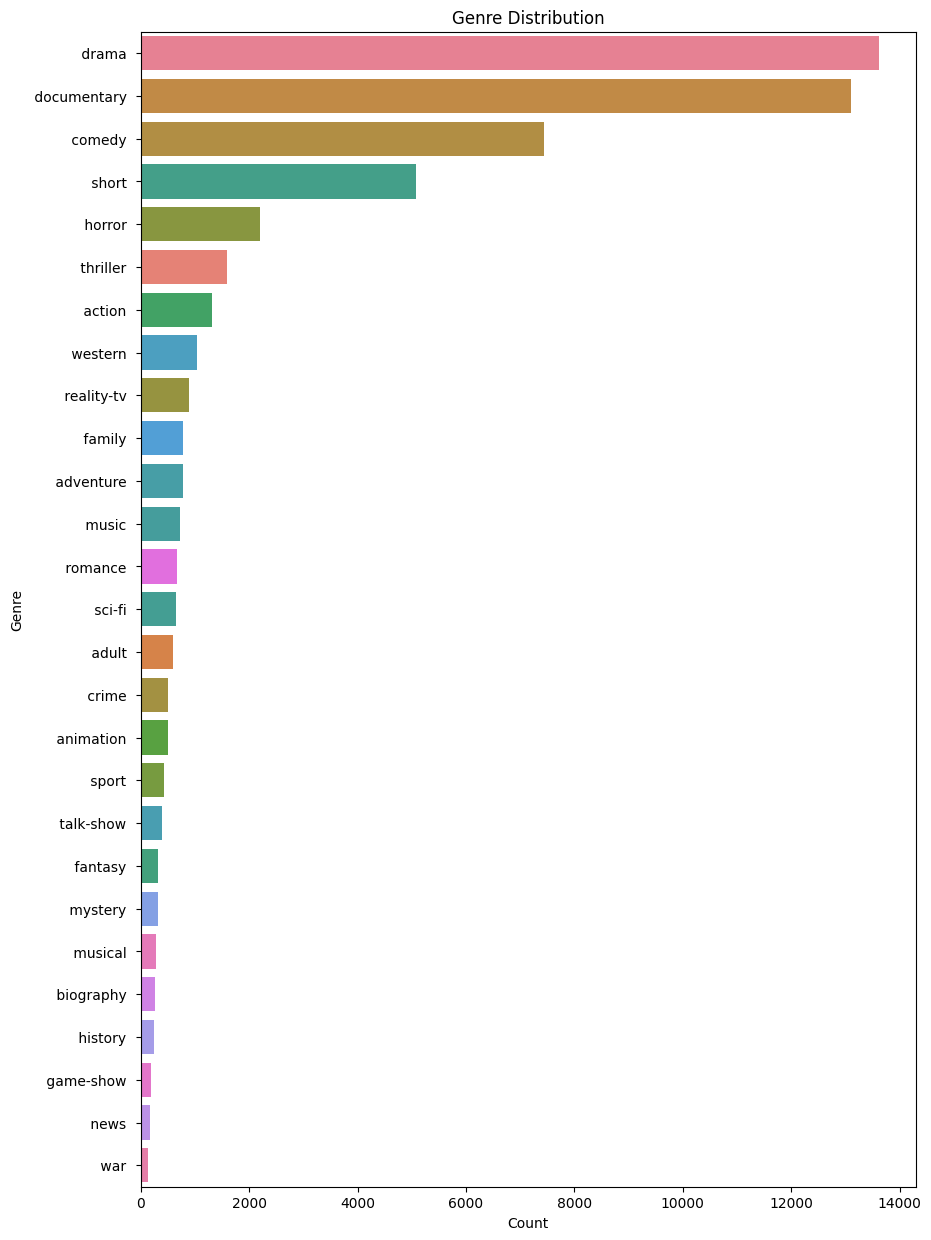

In [8]:
genre_order = data["GENRE"].value_counts().index
palette = sns.color_palette("husl", len(genre_order))  

plt.figure(figsize=(10, 15))
sns.countplot(data=data, y="GENRE", order=genre_order, hue="GENRE", palette=palette, legend=False)
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


In [9]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [23]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
print(classification_report(y_test, y_pred,zero_division=0))

              precision    recall  f1-score   support

           0       0.66      0.09      0.15       339
           1       0.71      0.07      0.13       135
           2       0.45      0.08      0.13       178
           3       0.00      0.00      0.00       126
           4       0.00      0.00      0.00        75
           5       0.50      0.44      0.47      1814
           6       0.00      0.00      0.00       142
           7       0.56      0.88      0.68      3296
           8       0.46      0.82      0.59      3374
           9       0.00      0.00      0.00       187
          10       0.00      0.00      0.00        90
          11       1.00      0.02      0.04        49
          12       0.00      0.00      0.00        61
          13       0.76      0.37      0.50       532
          14       0.87      0.11      0.20       178
          15       0.00      0.00      0.00        61
          16       0.00      0.00      0.00        77
          17       0.00    

In [24]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=1.0, max_iter=2000,class_weight="balanced") 
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

               precision    recall  f1-score   support

      action        0.33      0.43      0.37       339
       adult        0.30      0.60      0.40       135
   adventure        0.15      0.29      0.20       178
   animation        0.18      0.35      0.24       126
   biography        0.03      0.11      0.05        75
      comedy        0.61      0.45      0.52      1814
       crime        0.15      0.37      0.22       142
 documentary        0.81      0.52      0.64      3296
       drama        0.70      0.37      0.49      3374
      family        0.13      0.33      0.19       187
     fantasy        0.09      0.18      0.12        90
   game-show        0.54      0.71      0.61        49
     history        0.06      0.25      0.09        61
      horror        0.60      0.67      0.63       532
       music        0.34      0.74      0.47       178
     musical        0.13      0.38      0.19        61
     mystery        0.10      0.26      0.15        77
        n

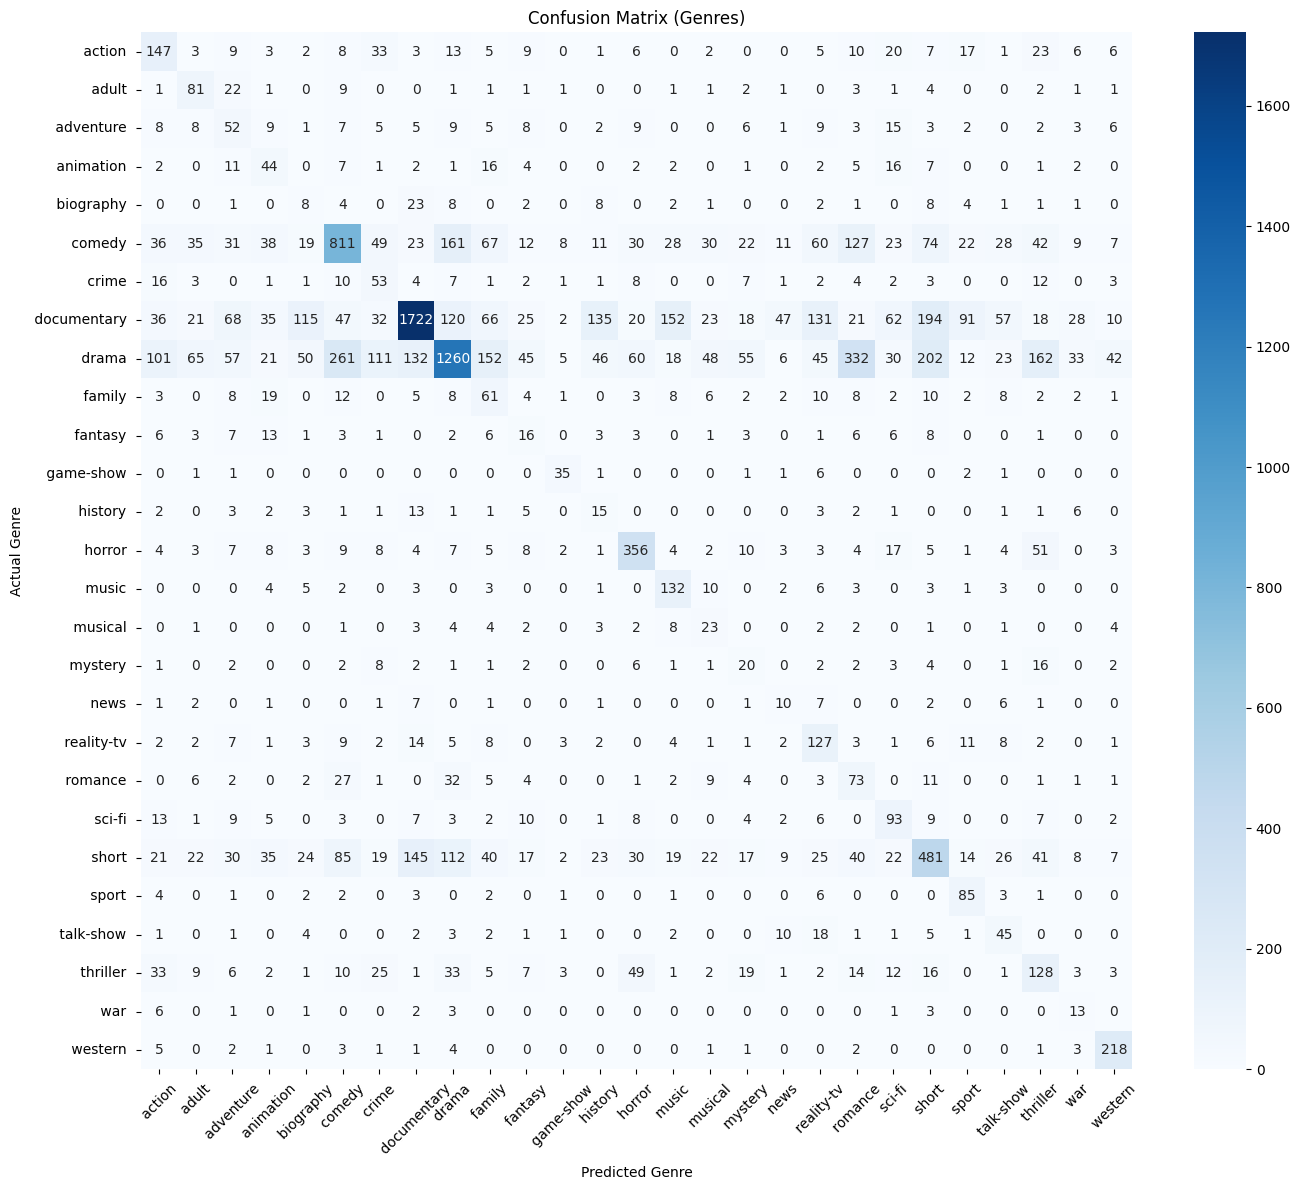

In [25]:

print(classification_report(y_test, y_pred, target_names=encoder.classes_))

y_test_labels = encoder.inverse_transform(y_test)
y_pred_labels = encoder.inverse_transform(y_pred)

# Get only genres that appear in test or prediction
labels = np.unique(np.concatenate((y_test_labels, y_pred_labels)))

# Compute confusion matrix
cm = confusion_matrix(y_test_labels, y_pred_labels, labels=labels)

# Plot the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted Genre")
plt.ylabel("Actual Genre")
plt.title("Confusion Matrix (Genres)")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

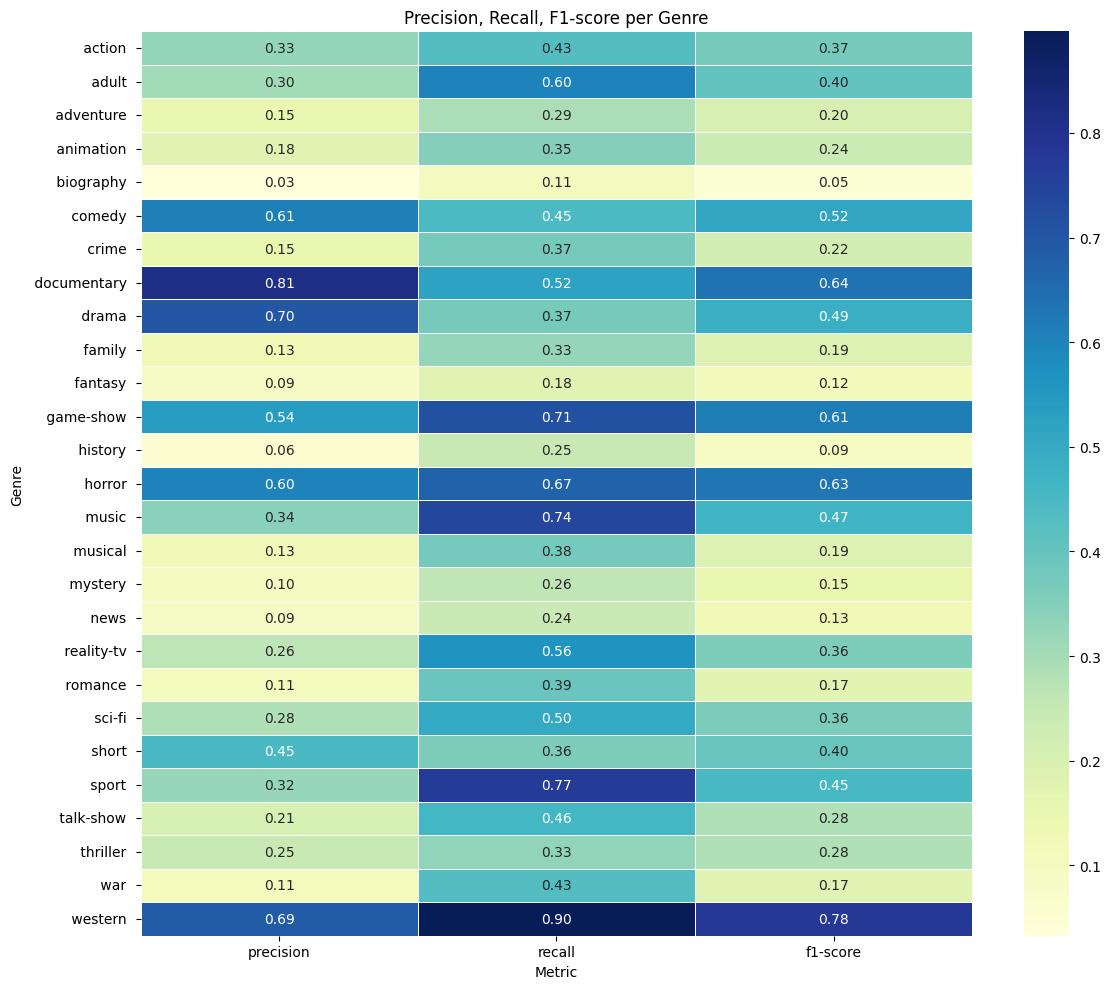

In [26]:
report = classification_report(y_test, y_pred, target_names=encoder.classes_, output_dict=True)

# Convert to DataFrame for heatmap
report_df = pd.DataFrame(report).transpose()

# Remove averages (optional)
report_df = report_df.iloc[:-3]

plt.figure(figsize=(12, 10))
sns.heatmap(report_df[['precision', 'recall', 'f1-score']], 
            annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)

plt.title("Precision, Recall, F1-score per Genre")
plt.ylabel("Genre")
plt.xlabel("Metric")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
